### Building chatbot with multiple tools using LangGraph

Aim: 
- Create a chatbot with tool capabilities from Arxiv, Wikipedia search and some functions

In [2]:
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper, ArxivAPIWrapper

In [3]:
api_wrapper_arxiv = ArxivAPIWrapper(top_k_results=2, doc_content_chars_max = 1000)

arxiv_tool = ArxivQueryRun(api_wrapper=api_wrapper_arxiv)

arxiv_tool.run("What is the latest research on AI?")

'Published: 2025-02-07\nTitle: What is Ethical: AIHED Driving Humans or Human-Driven AIHED? A Conceptual Framework enabling the Ethos of AI-driven Higher education\nAuthors: Prashant Mahajan\nSummary: The rapid integration of Artificial Intelligence (AI) in Higher Education\n(HE) is transforming personalized learning, administrative automation, and\ndecision-making. However, this progress presents a duality, as AI adoption also\nintroduces ethical and institutional challenges, including algorithmic bias,\ndata privacy risks, and governance inconsistencies. To address these concerns,\nthis study introduces the Human-Driven AI in Higher Education (HD-AIHED)\nFramework, ensuring compliance with UNESCO and OECD ethical standards. This\nconceptual research employs a qualitative meta-synthesis approach, integrating\nqualitative and quantitative studies to identify patterns, contradictions, and\ngaps in AI adoption within HE. It reinterprets existing datasets through\ntheoretical and ethical 

In [4]:
arxiv_tool.invoke("Attention is all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time on the performance of\nLlama-v2 models. We find that dropping dreeper attention layers only marginally\ndecreases performance but leads to the best speedups alongside dropping entire\nlayers. For example, removing 33\\% of attention layers in a 13B Llama2 model\nresults in a 1.8\\% drop in average performance over the OpenLLM benchmark. We\nalso observe that skipping layers except the latter layers reduces performances\nfor more layers skipped, except for skipping the attention layers.\n\n

In [5]:
api_wrapper_wiki = WikipediaAPIWrapper(top_k_results=2, doc_content_chars_max = 1000)

wiki_tool = WikipediaQueryRun(api_wrapper=api_wrapper_wiki)

wiki_tool.invoke("What is the latest research on AI?")

'Page: Artificial intelligence\nSummary: Artificial intelligence (AI) is the capability of computational systems to perform tasks typically associated with human intelligence, such as learning, reasoning, problem-solving, perception, and decision-making. It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals.\nHigh-profile applications of AI include advanced web search engines (e.g., Google Search); recommendation systems (used by YouTube, Amazon, and Netflix); virtual assistants (e.g., Google Assistant, Siri, and Alexa); autonomous vehicles (e.g., Waymo); generative and creative tools (e.g., language models and AI art); and superhuman play and analysis in strategy games (e.g., chess and Go). However, many AI applications are not perceived as AI: "A lot of cutting edge AI has filtered into gener

In [6]:
from dotenv import load_dotenv
import os

load_dotenv()
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

In [7]:
from langchain_community.tools import TavilySearchResults
tavily_tool = TavilySearchResults()

tavily_tool.invoke("What is the latest research on AI?")

/var/folders/d_/nlpw_2qx69j3vzw0s5vj48p80000gn/T/ipykernel_27379/2601453269.py:2: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily_tool = TavilySearchResults()


[{'title': 'The latest AI news we announced in May - Google Blog',
  'url': 'https://blog.google/technology/ai/google-ai-updates-may-2025/',
  'content': "Here are Google's latest AI updates from May 2025. ... The time to bridge the divide between AI research and real-world benefits is here.",
  'score': 0.5614318},
 {'title': 'The State of AI: Global survey | McKinsey',
  'url': 'https://www.mckinsey.com/capabilities/quantumblack/our-insights/the-state-of-ai',
  'content': 'In this latest version of the annual McKinsey Global Survey on AI, we look at the current trends that are driving real value from artificial intelligence.',
  'score': 0.52524763},
 {'title': 'The Top Artificial Intelligence Trends | IBM',
  'url': 'https://www.ibm.com/think/insights/artificial-intelligence-trends',
  'content': 'The future is always hard to predict. The breakneck pace of improvement in prior generations of AI models had many expecting the generation of models to be released in 2025 to make meaning

In [8]:
### combine all the tools in a list

from langchain_openai import ChatOpenAI
from pprint import pprint
from langchain_core.messages import HumanMessage, AIMessage

tools = [
    arxiv_tool, wiki_tool, tavily_tool
]
llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)
llm_with_tools = llm.bind_tools(tools)


In [17]:
llm_with_tools.invoke([HumanMessage(content=f"What is the recent AI news")])

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_S1RwPbpXmSmc6ITfNJlxKQzh', 'function': {'arguments': '{"query":"recent AI news"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 222, 'total_tokens': 242, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BmwfilnVqIAXQZBsPWkDfNjkEywOC', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--1893a73d-e4eb-4856-87f4-2ad858587be6-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'recent AI news'}, 'id': 'call_S1RwPbpXmSmc6ITfNJlxKQzh', 'type': 'tool_call'}], usage_metadata={'input_tokens': 222, 'output_tokens': 20, 'total_tokens

In [18]:
llm.invoke([HumanMessage(content=f"What is the recent AI news")])

AIMessage(content="One recent AI news is that researchers have developed a new AI system that can predict the risk of developing cardiovascular disease by analyzing a person's voice. The system uses machine learning algorithms to analyze vocal biomarkers and predict the likelihood of heart disease with high accuracy. This technology could potentially revolutionize the way cardiovascular disease is diagnosed and managed in the future.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 69, 'prompt_tokens': 13, 'total_tokens': 82, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BmwgemcPsfQ9ltT9PsD45hMoj8sNj', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--2da406f9-3adf-4767-ab46-

In [9]:
from typing import TypedDict
from langgraph.graph.message import add_messages
from typing import Annotated

class State(TypedDict):
    messages: Annotated[list[dict], add_messages]

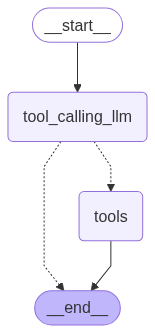

In [10]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition


def tool_calling_llm(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

graph = StateGraph(State)

graph.add_node("tool_calling_llm", tool_calling_llm)
graph.add_node("tools", ToolNode(tools))

graph.add_edge(START, "tool_calling_llm")
graph.add_conditional_edges("tool_calling_llm", tools_condition)
graph.add_edge("tools", END)

graph_builder = graph.compile()

display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [24]:
messages = graph_builder.invoke({"messages": HumanMessage(content="What is attention is all you need?")})
for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

What is attention is all you need?
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_vAIOJ6wtBWRXG7xXaq1uvNJ1)
 Call ID: call_vAIOJ6wtBWRXG7xXaq1uvNJ1
  Args:
    query: Attention Is All You Need
================================= Tool Message =================================
Name: wikipedia

Page: Attention Is All You Need
Summary: "Attention Is All You Need" is a 2017 landmark research paper in machine learning authored by eight scientists working at Google. The paper introduced a new deep learning architecture known as the transformer, based on the attention mechanism proposed in 2014 by Bahdanau et al. It is considered a foundational paper in modern artificial intelligence, and a main contributor to the AI boom, as the transformer approach has become the main architecture of a wide variety of AI, such as large language models. At the time, t

In [26]:
messages = graph_builder.invoke({"messages": HumanMessage(content="1706.03762")})
for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (call_spTkYjfjSLdInuB010fSRtJi)
 Call ID: call_spTkYjfjSLdInuB010fSRtJi
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, based
solely on attention mechanisms, dispensing with recurrence and convolutions
entirely. Experiments on two mac